In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
try:
    import csiborgtools
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import csiborgtools
import utils
%load_ext autoreload
%autoreload 2

import joblib
from os.path import join
from glob import glob

In [158]:
Nsim = 9844
simpath = csiborgtools.io.get_sim_path(Nsim)
Nsnap = 1016

outfname = join(utils.dumpdir, "ramses_out_{}_{}.npy".format(str(Nsim).zfill(5), str(Nsnap).zfill(5)))

mmain = csiborgtools.io.read_mmain(Nsim, "/mnt/zfsusers/hdesmond/Mmain")

data = np.load(outfname)
data = csiborgtools.io.merge_mmain_to_clumps(data, mmain)

data = data[(data["npart"] > 100) & np.isfinite(data["m200"])]

boxunits = csiborgtools.units.BoxUnits(Nsnap, simpath)

<IPython.core.display.Javascript object>


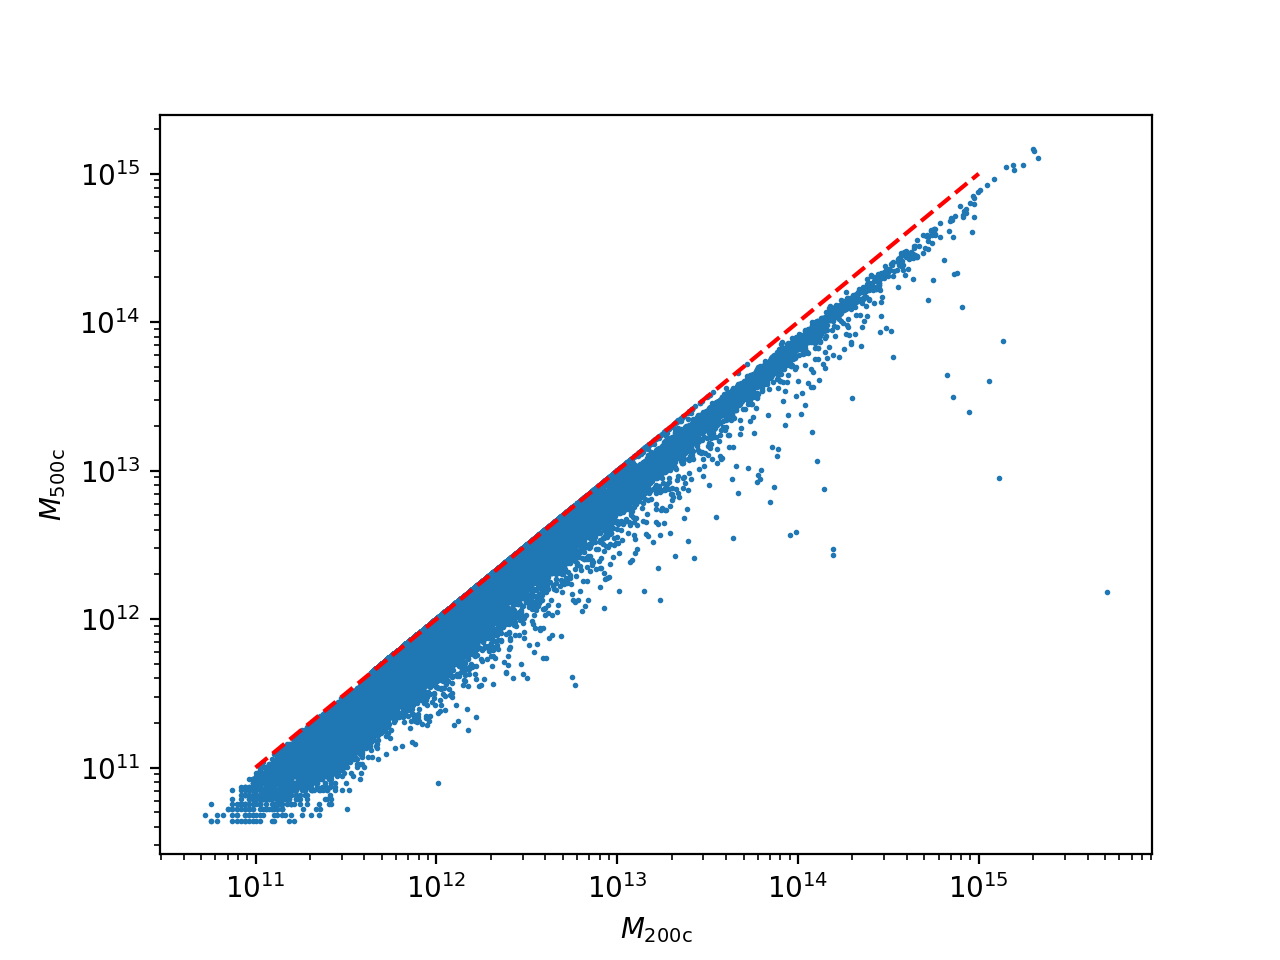

In [236]:
m200 = boxunits.box2solarmass(data["m200"])
m500 = boxunits.box2solarmass(data["m500"])


plt.figure()
plt.scatter(m200, m500, s=1, rasterized=True)
t = np.linspace(1e11, 1e15)
plt.plot(t,t,c="red", ls="--")
plt.yscale("log")
plt.xscale("log")

plt.xlabel(r"$M_{\rm 200c}$")
plt.ylabel(r"$M_{\rm 500c}$")
plt.savefig("../plots/masses.png", dpi=450)
plt.show()

<IPython.core.display.Javascript object>


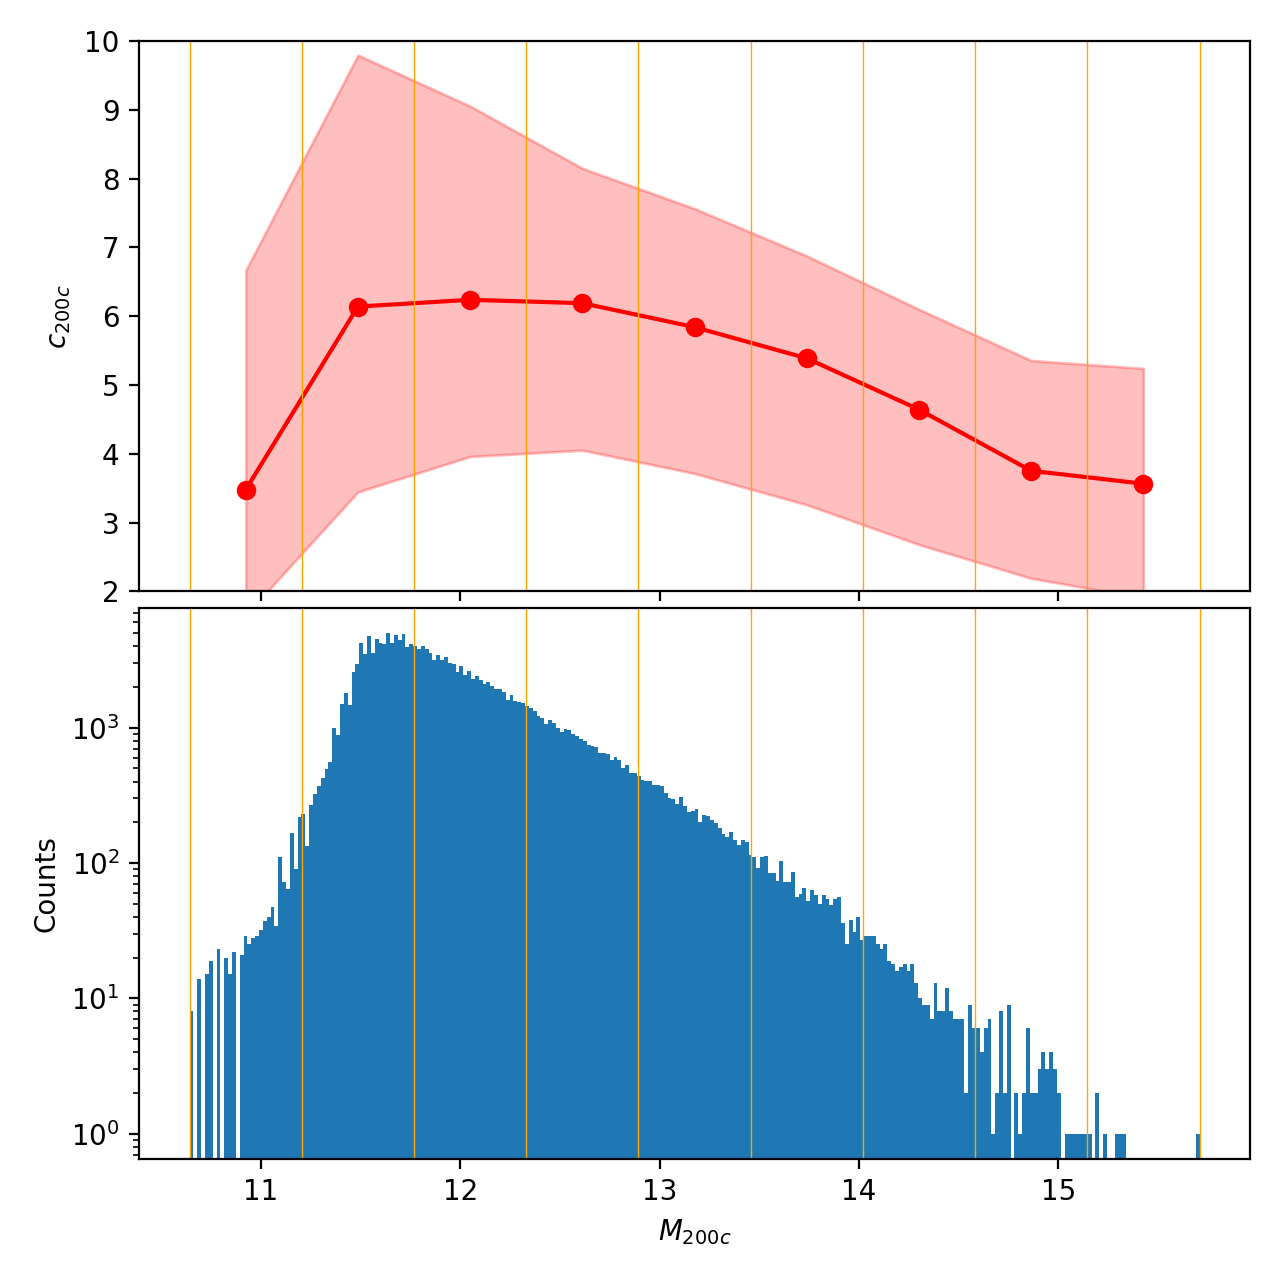

In [229]:
logm200 = np.log10(boxunits.box2solarmass(data["m200"]))
conc = data["conc"]

N = 10
bins = np.linspace(logm200.min(), logm200.max(), N)
x = [0.5*(bins[i] + bins[i + 1]) for i in range(N-1)]
y = np.full((N - 1, 3), np.nan)
for i in range(N - 1):
    mask = (logm200 >= bins[i]) & (logm200 < bins[i + 1]) & np.isfinite(conc)
    y[i, :] = np.percentile(conc[mask], [14, 50, 84])


    
    
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(6.4, 6.4 * 1))
fig.subplots_adjust(hspace=0)
axs[0].plot(x, y[:, 1], c="red", marker="o")
axs[0].fill_between(x, y[:, 0], y[:, 2], color="red", alpha=0.25)
axs[1].hist(logm200, bins="auto", log=True)

for b in bins:
    for i in range(2):
        axs[i].axvline(b, c="orange", lw=0.5)

axs[0].set_ylim(2, 10)
axs[1].set_xlabel(r"$M_{200c}$")
axs[0].set_ylabel(r"$c_{200c}$")
axs[1].set_ylabel(r"Counts")

plt.tight_layout(h_pad=0)
plt.savefig("../plots/mass_concentration.png", dpi=450)
plt.show()